In [1]:
import pandas as pd 
import numpy as np 

In [2]:
!pip install seaborn



In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

: Define the Problem
problem_statement = "Predict if total cases in a country on a date exceed 1 million"


In [5]:
#Data Collection and Loading dataset
df = pd.read_csv("data/coviddata.csv")


Data Cleaning & Preprocessing

In [6]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [7]:
df.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [8]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429434,ZWE,Africa,Zimbabwe,2024-08-04,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [10]:
# Check missing values
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [11]:
#For simplicity, let's focus on a subset of columns and drop rows with missing total_cases
df = df[['location', 'date', 'total_cases', 'total_deaths', 'total_tests', 'people_vaccinated', 'population']]

In [12]:
# removing rows with missing crucial data
df = df.dropna(subset=['total_cases', 'population']) 

In [13]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

Exploratory Data Analysis (EDA)

In [14]:
df.describe()

,date,total_cases,total_deaths,total_tests,people_vaccinated,population
count,411804,4.118040e+05,4.118040e+05,7.839000e+04,6.958500e+04,4.118040e+05
mean,2022-04-20 12:00:00.000000256,7.365292e+06,8.125957e+04,2.134039e+07,1.977073e+08,1.312668e+08
min,2020-01-05 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01
25%,2021-02-26 00:00:00,6.280750e+03,4.300000e+01,3.781175e+05,8.691040e+05,4.099890e+05
50%,2022-04-20 12:00:00,6.365300e+04,7.990000e+02,2.092540e+06,6.084613e+06,5.926344e+06
75%,2023-06-13 00:00:00,7.582720e+05,9.574000e+03,1.044389e+07,3.831266e+07,2.961172e+07
max,2024-08-04 00:00:00,7.758668e+08,7.057132e+06,9.214000e+09,5.631264e+09,7.975105e+09
std,NaN,4.477582e+07,4.411901e+05,8.460397e+07,7.877983e+08,6.683877e+08


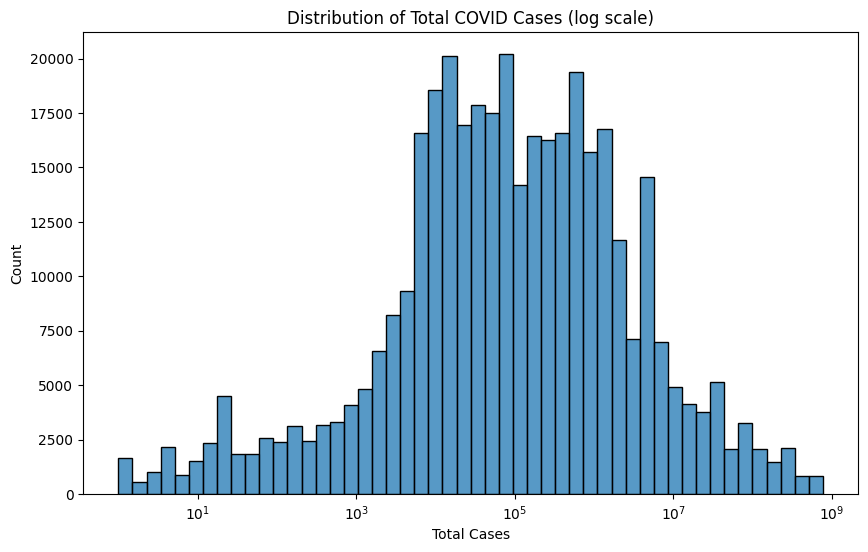

In [15]:
# Plot total_cases distribution (log scale to handle large range)
plt.figure(figsize=(10,6))
sns.histplot(df['total_cases'], bins=50, log_scale=True)
plt.title('Distribution of Total COVID Cases (log scale)')
plt.xlabel('Total Cases')
plt.ylabel('Count')
plt.show()

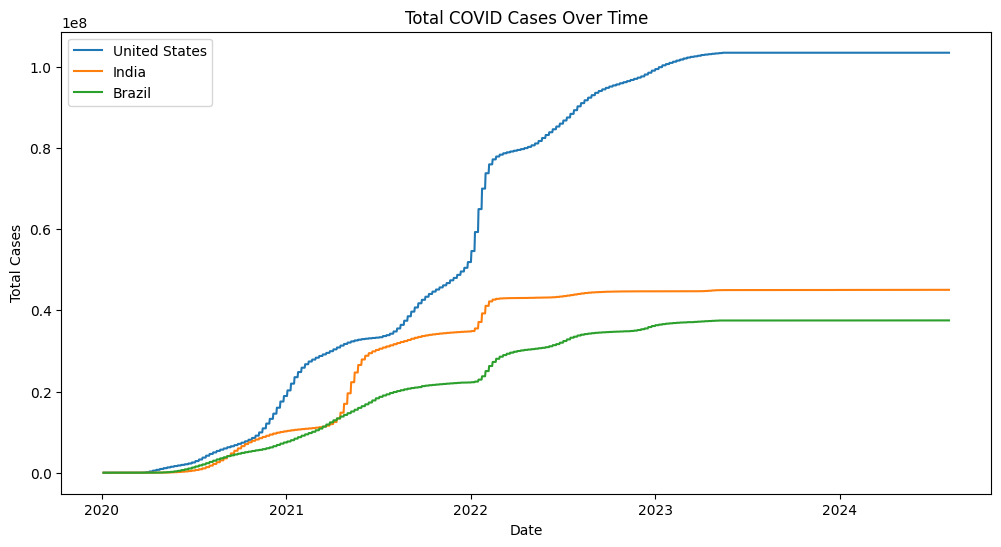

In [16]:
# Cases over time for a few countries
sample_countries = ['United States', 'India', 'Brazil']
plt.figure(figsize=(12,6))
for country in sample_countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()


# Step: Compare Death Rates vs. Recovery Rates




In [17]:

# Estimate recoveries (if 'total_recovered' is not in your dataset)
df['estimated_recovered'] = df['total_cases'] - df['total_deaths']


In [18]:
# Calculate death rate and recovery rate
df['death_rate'] = df['total_deaths'] / df['total_cases']
df['recovery_rate'] = df['estimated_recovered'] / df['total_cases']


In [19]:

# Drop infinite values or NaNs from division
df = df.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['death_rate', 'recovery_rate'])

In [20]:
# Plot comparison for selected countries on the latest available date
latest_df = df.sort_values('date').groupby('location').tail(1)


In [21]:

# Choose top countries by total cases
top_countries = latest_df.sort_values('total_cases', ascending=False).head(10)


In [22]:
# Melt the data for seaborn
plot_data = top_countries[['location', 'death_rate', 'recovery_rate']].melt(id_vars='location',
                                                                            value_vars=['death_rate', 'recovery_rate'],
                                                                            var_name='Rate Type',
                                                                            value_name='Rate')


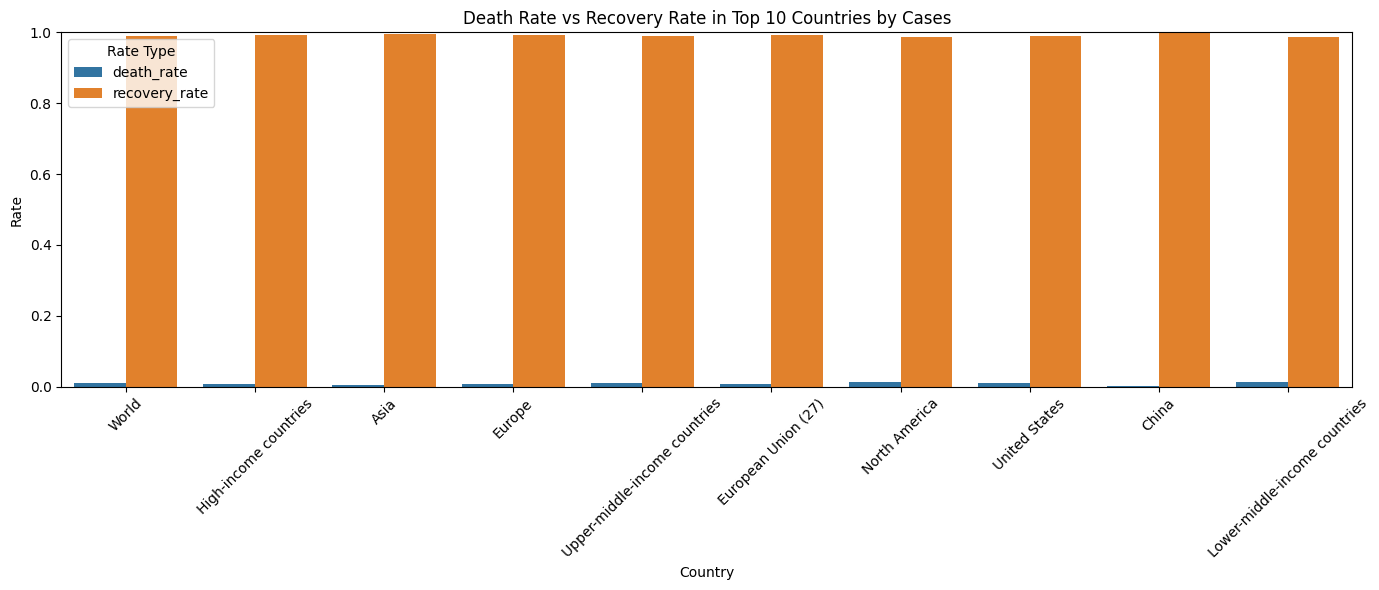

In [23]:
# Seaborn barplot

plt.figure(figsize=(14, 6))
sns.barplot(data=plot_data, x='location', y='Rate', hue='Rate Type')
plt.xticks(rotation=45)
plt.title('Death Rate vs Recovery Rate in Top 10 Countries by Cases')
plt.ylabel('Rate')
plt.xlabel('Country')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()



Feature Engineering

In [25]:
# Create a binary target: 1 if total_cases > 1 million, else 0
df['high_cases'] = (df['total_cases'] > 1_000_000).astype(int)


In [26]:
# selecting some features
features = ['total_deaths', 'total_tests', 'people_vaccinated', 'population']

In [27]:
# Fill missing values in these features with 0 for simplicity
df[features] = df[features].fillna(0)

In [28]:
X = df[features]
y = df['high_cases']


 Modeling / Analysis

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [30]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
y_pred = model.predict(X_test)

Interpret Results

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9998039215686274
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57701
           1       1.00      1.00      1.00     18799

    accuracy                           1.00     76500
   macro avg       1.00      1.00      1.00     76500
weighted avg       1.00      1.00      1.00     76500



Visualization & Reporting

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

Make Decisions / Recommendations

In [36]:
accuracy = accuracy_score(y_test, y_pred)
if accuracy > 0.8:
    print("Model performs well for classifying high COVID case days.")
else:
    print("Model needs improvement, consider more features or tuning.")

Model performs well for classifying high COVID case days.


Deployment & Monitoring 

In [37]:
import joblib

In [38]:
joblib.dump(model, 'covid_high_cases_model.pkl')
print("Model saved for deployment.")

Model saved for deployment.
